# Mehrwegekanal

## Impulsantwort und Übertragungsfunktion im äquivalenten Basisband

Mehrwegekanäle kommen in sehr vielen Kommunikationssystemen vor. In drahtgebundenen Kommunikationssystemen resultieren Mehrwegeausbreitungen aus fehlangepassten Leitungsenden, die das ankommende Signal (zum Teil) reflektieren. Im Mobilfunk treten Reflexionen, Beugungen und Streuungen der elektromagnetischen Welle an in der Umgebung befindlichen Objekten auf. Die reflektierten, gebeugten bzw. gestreuten Signalanteile überlagern sich mit dem direkten Signal, sind gegenüber diesem aber aufgrund der unterschiedlichen Weglängen verzögert und gedämpft. Wird ein derartiger Übertragungskanal als lineares System mit der Impulsantwort $\tilde{h}(t)$ modelliert, lautet das Empfangssignal für den rauschfreien Fall im äquivalenten Basisband

\begin{equation}
  y(t) = \tilde{h}(t) \ast x(t) 
       = T_{\mathrm{S}} \cdot \sum_i d[i] \cdot \tilde{h}(t) \ast g_{\mathrm{S}}(t-iT_{\mathrm{S}}) \; .
\end{equation}

Nach der Filterung mit dem Empfangsfilter $g_{\mathrm{E}}(t)$ erhalten wir

\begin{equation}
  r(t) = g_{\mathrm{E}}(t) \ast y(t) 
       = T_{\mathrm{S}} \cdot \sum_i d[i] \cdot g_{\mathrm{E}}(t) \ast \tilde{h}(t) \ast g_{\mathrm{S}}(t-iT_{\mathrm{S}})
       = T_{\mathrm{S}} \cdot \sum_i d[i] \cdot h(t-iT_{\mathrm{S}}) \; .
\end{equation}

Die Gesamtimpulsantwort $h(t) = g_{\mathrm{E}}(t) \ast \tilde{h}(t) \ast g_{\mathrm{S}}(t)$ bestehend aus Sende- und Empfangsfilter sowie der Impulsantwort des physikalischen Kanals  umfasst in diesem einfachen Modell alle zeitkontinuierlichen Komponenten. Im Folgenden wird ein einfacher Zweiwegekanal mit der Impulsantwort

\begin{equation}
    h(t) = h_0 \delta(t) + h_{\mu} \delta(t- \mu T_{\mathrm{S}})
\end{equation}

betrachtet. Er besteht aus zwei Ausbreitungspfaden, eine direkte "line-of-sight"-Verbindung ohne Verzögerung mit der Amplitude $h_0$ und eine zweite um $\mu T_{\mathrm{S}}$ verzögerte Komponente mit der Amplitude $h_{\mu}$. Die Übertragungsfunktion dieses Kanals lautet

\begin{equation}
    H(j \omega) = h_0 + h_{\mu} e^{-j \mu \omega T_{\mathrm{S}}} \; ,
\end{equation}

woraus sich der Betragsfrequenzgang

\begin{equation}
    |H(j \omega)| = \sqrt{ h_0^2 + h_{\mu}^2 + 2 h_0 h_{\mu} \cos(\mu \omega T_{\mathrm{S}}) }
\end{equation}

und der Phasengang

\begin{equation}
    \varphi(\omega) = - \arctan \frac{h_{\mu} \sin(\mu \omega T_{\mathrm{S}})}{h_0 + h_{\mu} \cos(\mu \omega T_{\mathrm{S}})} 
\end{equation}

ergeben.

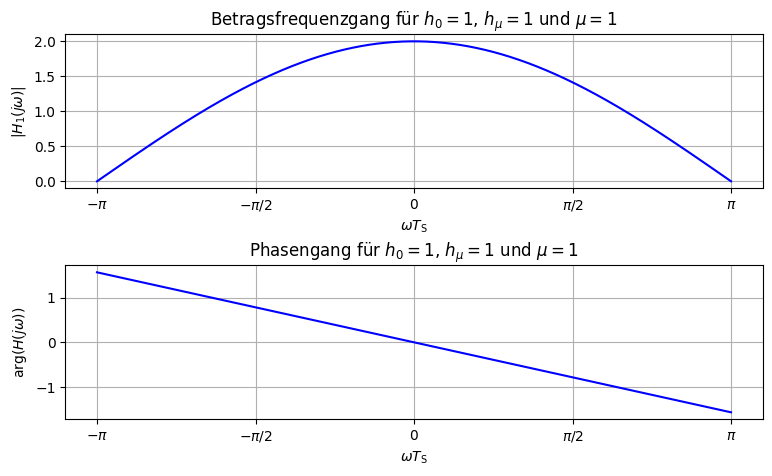

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# delays of propagation paths (integer multiples of symbol duration)
tauh1 = np.array((0, 1))
# channel impulse response
h1 = np.array((1, 1))

# normalized frequency in radians
N_f = 1000
omegaTs = np.linspace(-np.pi,np.pi,N_f)

# channel transfer function
H1 = h1 @ np.exp(-1j * np.outer(tauh1, omegaTs))

# magnitude
absH1 = np.abs(H1)
# phase
phaseH1 = np.angle(H1)

fig_H1 = plt.figure(figsize=(9,5))
plt.subplots_adjust(hspace=0.5)

ax1 = fig_H1.add_subplot(211)
ax1.plot(omegaTs, absH1, 'b-')
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.ylabel('$|H_1(j \omega)|$')
plt.title('Betragsfrequenzgang für $h_0=$%g, $h_{\mu}=$%g und $\mu=$%g' %(h1[0],h1[1],tauh1[1]))
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.grid(True)

ax2 = fig_H1.add_subplot(212)
ax2.plot(omegaTs, phaseH1, 'b-')
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.ylabel('arg$(H(j \omega))$')
plt.title('Phasengang für $h_0=$%g, $h_{\mu}=$%g und $\mu=$%g' %(h1[0],h1[1],tauh1[1]))
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.grid(True)

plt.show()

In den obigen Abbildungen sind jeweils eine Periode $- \pi \leq \omega T_{\mathrm{S}} \leq \pi$ des Betragsfrequenzgangs und des Phasengangs für $\mu=1$ und $h_0=h_{\mu}=1$ dargestellt. Man erkennt deutlich den Kosinus-förmigen Verlauf des Amplitudengangs und den linearen Verlauf des Phasengangs.

In den beiden unteren Bildern sind Betragsfrequenzgang und Phasengang für $\mu=2$ und $h_0=1$, $h_{\mu}=0.5$ dargestellt. Die stärkere Welligkeit wird durch die größere Verzögerung des zweiten Ausbreitungspfades von $2T_{\mathrm{S}}$ verursacht. Es ist ferner der deutlich nichtlineare Verlauf der Phase wegen $h_0 \neq h_{\mu}$ zu erkennen.

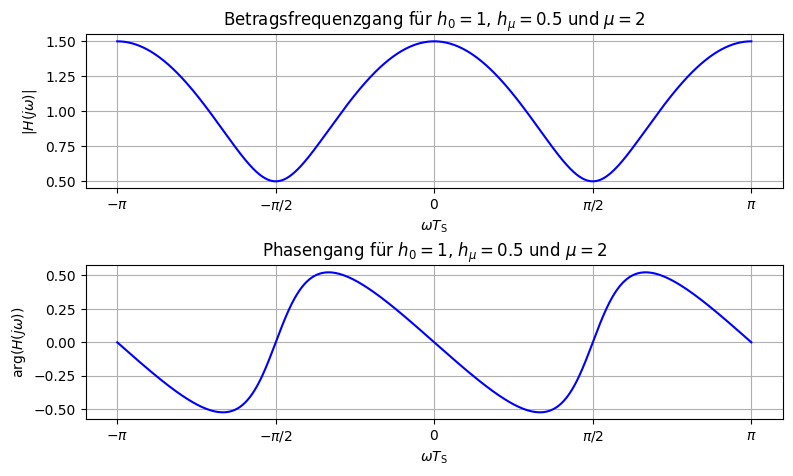

In [2]:
# delays of propagation paths (integer multiples of symbol duration)
tauh2 = np.array((0, 2))
# channel impulse response
h2 = np.array((1.0, 0.5))

# channel transfer function
H2 = h2 @ np.exp(-1j * np.outer(tauh2, omegaTs))

# magnitude
absH2 = np.abs(H2)
#phase
phaseH2 = np.angle(H2)

fig_H2 = plt.figure(figsize=(9,5))
plt.subplots_adjust(hspace=0.5)

ax1 = fig_H2.add_subplot(211)
ax1.plot(omegaTs, absH2, 'b-')
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.ylabel('$|H(j \omega)|$')
plt.title('Betragsfrequenzgang für $h_0=$%g, $h_{\mu}=$%g und $\mu=$%g' %(h2[0],h2[1],tauh2[1]))
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.grid(True)

ax2 = fig_H2.add_subplot(212)
ax2.plot(omegaTs, phaseH2, 'b-')
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.ylabel('arg$(H(j \omega))$')
plt.title('Phasengang für $h_0=$%g, $h_{\mu}=$%g und $\mu=$%g' %(h2[0],h2[1],tauh2[1]))
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.grid(True)

plt.show()

Für einen beliebigen Mehrwegekanal mit $L_{\mathrm{h}}$ Ausbreitungspfaden und der Impulsantwort

\begin{equation}
  h(t) = \sum_{\mu=0}^{L_h-1} h_{\mu} \cdot \delta(t-\mu T_{\mathrm{S}})
\end{equation}


\begin{equation}
  H(j \omega) = \sum_{\mu=0}^{L_h-1} h_{\mu} \cdot e^{-j \omega \mu T_{\mathrm{S}}} \; .
\end{equation}

Geschlossene analytische Ausdrücke für Betragsfrequenzgang und Phasengang lassen sich nun nicht mehr allgemein herleiten. Für einen zufällig ausgewürfelten Mehrwegekanal der Länge 5 ($L_h=4$) mit gaußverteilten Kanalkoeffizienten $h_{\mu}$ und Verzögerungen $\mu \in \{0,1,2,3,4\}$ erhalten wir die unten dargestellten Verläufe.

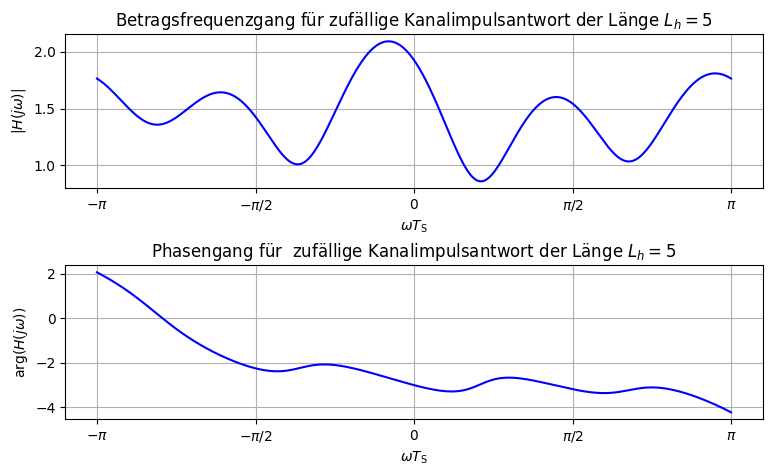

In [3]:
# delays of propagation paths (integer multiples of symbol duration)
L_h = 5
tauh3 = np.arange(L_h)
# channel impulse response
h3 = (np.random.randn(L_h) + 1j*np.random.randn(L_h))/np.sqrt(2.0)

# channel transfer function
H3 = h3 @ np.exp(-1j * np.outer(tauh3, omegaTs))

# magnitude
absH3 = np.abs(H3)
#phase
phaseH3 = np.unwrap(np.angle(H3))

fig_H3 = plt.figure(figsize=(9,5))
plt.subplots_adjust(hspace=0.5)

ax1 = fig_H3.add_subplot(211)
ax1.plot(omegaTs, absH3, 'b-')
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.ylabel('$|H(j \omega)|$')
plt.title('Betragsfrequenzgang für zufällige Kanalimpulsantwort der Länge $L_h=$%g' %(L_h))
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.grid(True)

ax2 = fig_H3.add_subplot(212)
ax2.plot(omegaTs, phaseH3, 'b-')
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.ylabel('arg$(H(j \omega))$')
plt.title('Phasengang für  zufällige Kanalimpulsantwort der Länge $L_h=%g$' %(L_h))
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.grid(True)

plt.show()

## Gruppen und Phasenlaufzeit 

Gruppen- und Phasenlaufzeit sind folgendermaßen definiert.

\begin{align}
    \tau_g(\omega) &= - \frac{d \varphi(\omega)}{d\omega} \\
    \tau_p(\omega) &= - \frac{\varphi(\omega)}{\omega} \; .
\end{align}

Dabei gibt die Gruppenlaufzeit $\tau_g(\omega)$ die Verzögerung der komplexen Einhüllenden des Sendesignals an, während die Phasenlaufzeit $\tau_p(\omega)$ die Verzögerung der Trägerschwingung beschreibt. Für einen einfachen Zweiwegekanal mit den reellen Kanalkoeffizienten $h_0$ und $h_{\mu}$ sowie der Verzögerung $\mu T_{\mathrm{S}}$ erhalten wir die Gruppenlaufzeit

\begin{align}
    \tau_g(\omega) 
    &= \frac{d}{d\omega} \arctan \frac{h_{\mu} \sin(\mu \omega T_{\mathrm{S}})}{h_0 + h_{\mu} \cos(\mu \omega T_{\mathrm{S}})} \\
    &= \mu T_{\mathrm{S}} \cdot 
        \frac{1}{1+\left(
            \frac{h_{\mu} \sin(\mu \omega T_{\mathrm{S}})}{h_0 + h_{\mu} \cos(\mu \omega T_{\mathrm{S}})} \right)^2} 
        \cdot \frac{h_{\mu} \cos(\mu \omega T_{\mathrm{S}})(h_0 + h_{\mu} \cos(\mu \omega T_{\mathrm{S}}))
                    +h_{\mu}^2 \sin^2(\mu \omega T_{\mathrm{S}})}
                  {(h_0 + h_{\mu} \cos(\mu \omega T_{\mathrm{S}}))^2} \\
    &= \mu T_{\mathrm{S}} \cdot 
        \frac{h_0 h_{\mu} \cos(\mu \omega T_{\mathrm{S}}) + h_{\mu}^2}
             {h_0^2 + h_{\mu}^2 +2 h_0 h_{\mu} \cos(\mu \omega T_{\mathrm{S}})}
\end{align}

Für allgemeine Mehrwegekanäle lassen sich beide Kenngrößen nur numerisch auswerten. Die Verläufe sind in den unteren Bildern dargestellt.

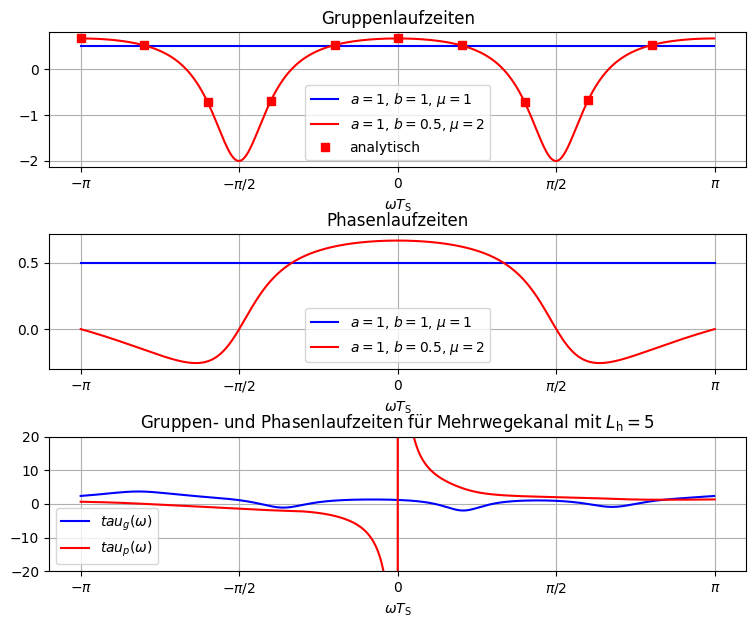

In [4]:
domegaTs = omegaTs[1] - omegaTs[0]
tau_g1 = - np.diff(phaseH1) / domegaTs
tau_p1 = - phaseH1 / omegaTs
tau_g2 = - np.diff(phaseH2) / domegaTs
tau_p2 = - phaseH2 / omegaTs
tau_g3 = - np.diff(phaseH3) / domegaTs
tau_p3 = - phaseH3 / omegaTs

# analytical formula for group delay for channel h2
cosmuomegaTs = np.cos(tauh2[1] * omegaTs)
tau_g2_analyt = tauh2[1] * h2[1] * (h2[1]+h2[0]*cosmuomegaTs)/(h2[0]**2+h2[1]**2+2*h2[0]*h2[1]*cosmuomegaTs)

fig_pg = plt.figure(figsize=(9,7))
plt.subplots_adjust(hspace=0.5)

ax1 = fig_pg.add_subplot(311)
ax1.plot(omegaTs[0:len(omegaTs)-1], tau_g1, 'b-',label=('$a=$%g, $b=$%g, $\mu=$%g' %(h1[0],h1[1],tauh1[1])))
ax1.plot(omegaTs[0:len(omegaTs)-1], tau_g2, 'r-',label=('$a=$%g, $b=$%g, $\mu=$%g' %(h2[0],h2[1],tauh2[1])))
ax1.plot(omegaTs, tau_g2_analyt, 'rs',markevery=100,label='analytisch')
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.legend()
plt.title('Gruppenlaufzeiten')
#plt.ylim(-2,2)
plt.grid(True)

ax2 = fig_pg.add_subplot(312)
ax2.plot(omegaTs, tau_p1, 'b-',label=('$a=$%g, $b=$%g, $\mu=$%g' %(h1[0],h1[1],tauh1[1])))
ax2.plot(omegaTs, tau_p2, 'r-',label=('$a=$%g, $b=$%g, $\mu=%g$' %(h2[0],h2[1],tauh2[1])))
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.legend()
plt.title('Phasenlaufzeiten')
plt.grid(True)

ax3 = fig_pg.add_subplot(313)
ax3.plot(omegaTs[0:len(omegaTs)-1], tau_g3, 'b-',label='$tau_g(\omega)$')
ax3.plot(omegaTs, tau_p3, 'r-',label='$tau_p(\omega)$')
plt.xlabel('$\omega T_{\mathrm{S}}$')
plt.xticks(np.linspace(-np.pi,np.pi,5),['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$'])
plt.legend()
plt.title('Gruppen- und Phasenlaufzeiten für Mehrwegekanal mit $L_{\mathrm{h}}=$%g' %(L_h))
plt.ylim(-20,20)
plt.grid(True)

plt.show()